# Clustering: k-means and GMM

This interactive notebook shows how to use k-means and Gaussian Mixture Models (GMM) using the library scikit-learn.
It is intended to give you a more intuitive understanding of the underlying concepts.
To do this, we will apply these algorithms to different datasets and visualize the results.
While both can be used for clustering, GMMs are actually generative models, so we will also use them to sample new data.

Throughout this notebook, you will find several interactive sliders.
Please feel free to play around with them to change the parameters of the algorithms.
After you have completed the notebook, you can also try to modify the code directly.

Let's get started! First, we need to import some libraries:

In [54]:
%matplotlib inline
import seaborn as sns
sns.set()
from plotting import *
from ipywidgets import interact, widgets

## Clustering with k-means

First, we will generate a simple dataset using `sklearn.datasets.make_blobs`.
This function samples points from a number of normal distributions (in this case 3).

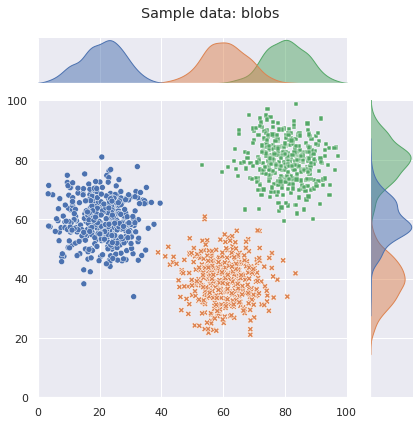

In [55]:
from sklearn.datasets import make_blobs

data_simple, labels_simple = make_blobs(
    n_features=2,
    n_samples=1200,
    centers = [
        [20, 60],
        [60, 40],
        [80, 80]
    ],
    cluster_std= [
        7,
        7,
        7
    ]
)
plot_clustering(data_simple, labels_simple, _title="Sample data: blobs")

Now, let's apply the k-means clustering algorithm to our freshly generated data.
In order to do this, we must define the number of clusters that we want to have.
Note that the initial labels of the data points are not seen by the clustering algorithm.

Go ahead and try different numbers of clusters. What can you observe?

In [72]:
from sklearn.cluster import KMeans

def do_kmeans_clustering_blobs(n_clusters):
    global kmeans
    kmeans = KMeans(
        n_clusters=n_clusters,
        # init='random',
        # n_init=1,
        # max_iter=1,
        random_state=42,
    )

    # Fit the data
    kmeans.fit(data_simple)

    # Output the centers and plot the clustering result
    plot_clustering(data_simple, kmeans.labels_, _centers=kmeans.cluster_centers_, _title="k-means clusters: blobs")

_=interact(do_kmeans_clustering_blobs,
           n_clusters=widgets.IntSlider(min=1, max=20, value=3, description="clusters"),
           )

print(f"Cluster centers:\n {kmeans.cluster_centers_}")

interactive(children=(IntSlider(value=3, description='clusters', max=20, min=1), Output()), _dom_classes=('wid…

Cluster centers:
 [[20.92443607 59.31541533]
 [60.65790428 39.35168625]
 [80.24900432 79.74131326]]


k-means optimizes the clusters in an iterative way.
By default, it initializes the clusters by sampling random points from the given data.
We can initialize the cluster centers with predefined coordinates, and see how the clustering changes with each iteration by moving the 'iteration' slider until it converges to a good solution.

In [73]:
def do_kmeans_cluster_over_time(i):
    global kmeans

    initial_centers = np.array([
        [20, 20],
        [20, 30],
        [20, 40]
    ])

    kmeans = KMeans(
        n_clusters=3,
        init=initial_centers, n_init=1,
        max_iter=i,
        random_state=42,
    )
    kmeans.fit(data_simple)

    plot_clustering(data_simple, kmeans.labels_, _centers=kmeans.cluster_centers_, _title="k-means clusters: blobs")

_=interact(do_kmeans_cluster_over_time,
           i=widgets.IntSlider(min=1, max=20, value=1, description="iteration"),
           )

print(f"Cluster centers:\n {kmeans.cluster_centers_}")

interactive(children=(IntSlider(value=1, description='iteration', max=20, min=1), Output()), _dom_classes=('wi…

Cluster centers:
 [[57.58327434 23.014559  ]
 [60.91594027 31.23033409]
 [53.1988921  62.5566811 ]]


### Example: Blobs with different variances

Now, let's make the clustering a little bit more challenging by changing the dataset.
We will move the smaller cluster on the left closer to the other clusters, and change the components' covariances.

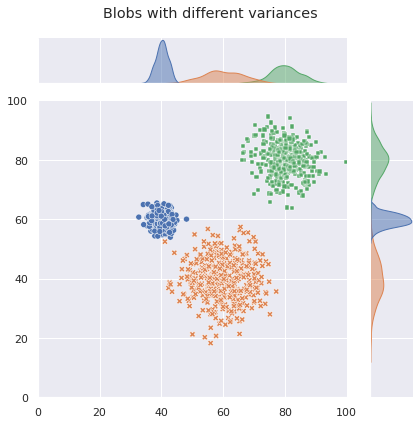

In [58]:
data_varied, labels_varied = make_blobs(
    n_features=2,
    n_samples=1200,
    centers=[
        [40, 60],
        [60, 40],
        [80, 80]
    ],
    cluster_std=[
        2,
        7,
        5
    ]
)
plot_clustering(data_varied, labels_varied, _title="Blobs with different variances")

Now let's again apply k-means to our data.
You can see that the cluster centered around (40, 60) includes some points to the neighboring cluster.
To find out why this is the case, you can take a look at the decision boundaries by checking 'Show decision boundary'.

In [89]:
def do_kmeans_clustering_varied(n_clusters, plot_decision_boundary):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_varied)

    plot_clustering(data_varied,
                    kmeans.labels_,
                    _centers=kmeans.cluster_centers_,
                    _title="k-means clusters",
                    _decision_boundary_model=kmeans if plot_decision_boundary else None
                    )

_=interact(do_kmeans_clustering_varied,
           n_clusters=widgets.IntSlider(min=1, max=10, value=3, description="clusters"),
           plot_decision_boundary=widgets.Checkbox(value=False, description='Show decision boundary')
           )

interactive(children=(IntSlider(value=3, description='clusters', max=10, min=1), Checkbox(value=False, descrip…

## Introducing Gaussian Mixture Models

Another type of model that can be used for clustering are Gaussian Mixture Models (GMMs).
GMMs are generative models that approximate the given data using a mixture of Gaussian distributions (components), but they can also be used for classification and clustering.

Let's directly apply GMMs to the data from our previous example that showed the shortcomings of k-means.
The standard deviations of each component in the GMM are visualized as ellipses around the respective component mean.

In this case, the clustering that results from the GMM seems to be a better solution than k-means.
Before you enable the visualization of the decision boundaries, think about the following questions:
* What will be the decision boundary for the cluster centered around (40, 60)?
* What will be the decision boundary for the cluster centered around (60, 40)?
* How will a new point at (10, 10) be classified?

In [90]:
from sklearn.mixture import GaussianMixture

def do_gmm_clustering_varied(n_components, show_decision_boundary):
    global gmm
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(data_varied)
    gmm_labels = gmm.predict(data_varied)

    plot_clustering(data_varied, gmm_labels,
                    _centers=gmm.means_,
                    _covars=gmm.covariances_,
                    _weights=gmm.weights_,
                    _n_std=3,
                    _title="GMM clusters",
                    _decision_boundary_model=gmm if show_decision_boundary else None,
    )

_=interact(do_gmm_clustering_varied,
           n_components=widgets.IntSlider(min=1, max=10, value=3, description="components"),
           show_decision_boundary=widgets.Checkbox(value=False, description="Show decision boundary")
           )

print_gmm(gmm, _weights=True)


interactive(children=(IntSlider(value=3, description='components', max=10, min=1), Checkbox(value=False, descr…

GMM means:
 [[40.12980384 59.76983869]
 [80.05306281 79.80969244]
 [59.87164904 39.61695273]]

GMM covariances:
 [[[ 4.17357148 -0.2058659 ]
  [-0.2058659   4.68424722]]

 [[25.53122807 -2.79566691]
  [-2.79566691 28.62489218]]

 [[45.02195894  0.13632888]
  [ 0.13632888 49.69990695]]]

GMM weights:
 [0.33364149 0.33332459 0.33303392]



### Example: Transformed blobs

Next, we will apply an affine transformation to our initial data points.
This is as if we would sample from normal distributions where the covariance matrix is not diagonal, but full.

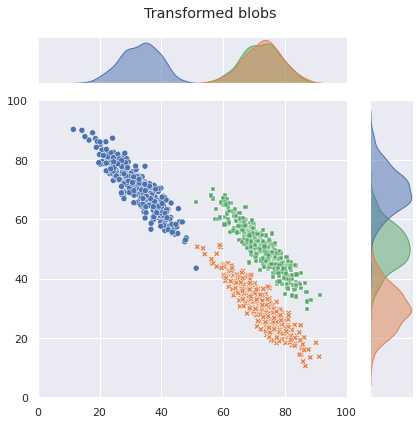

In [91]:
#Transform data
transformation = [
    [0.8, -0.6],
    [-0.4, 0.8]
]
data_transformed = np.dot(data_simple, transformation)
data_transformed[:, 0] = data_transformed[:, 0] + 40
data_transformed[:, 1] = data_transformed[:, 1] + 35

plot_clustering(data_transformed, labels_simple, _title="Transformed blobs")

Now let's apply k-means and GMM on this data.
What do you expect the results will look like?

In [93]:
def do_clustering_adb(n_clusters):
    global gmm

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_transformed)
    plot_clustering(data_transformed, kmeans.labels_, _centers=kmeans.cluster_centers_,
        _decision_boundary_model=kmeans,
        _title="Transformed blobs: k-means"
    )

    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(data_transformed)
    gmm_labels = gmm.predict(data_transformed)
    plot_gmm_clustering(data_transformed, gmm_labels, gmm,
        _decision_boundary=True,
        _title="Transformed blobs: GMM"
    )

_=interact(do_clustering_adb,
           n_clusters=widgets.IntSlider(min=1, max=8, step=1, value=3, description="clusters"),
           )

print_gmm(gmm)

GMM means:
 [[72.30571599 50.6489443 ]
 [33.04366866 69.87090559]
 [72.80292392 30.0772089 ]]

GMM covariances:
 [[[ 41.21697962 -42.26112702]
  [-42.26112702  51.9622504 ]]

 [[ 42.75350133 -43.27447997]
  [-43.27447997  53.3160917 ]]

 [[ 41.49048104 -41.95481939]
  [-41.95481939  53.00715057]]]



interactive(children=(IntSlider(value=3, description='clusters', max=8, min=1), Output()), _dom_classes=('widg…

GMM means:
 [[72.30571599 50.6489443 ]
 [33.04366866 69.87090559]
 [72.80292392 30.0772089 ]]

GMM covariances:
 [[[ 41.21697962 -42.26112702]
  [-42.26112702  51.9622504 ]]

 [[ 42.75350133 -43.27447997]
  [-43.27447997  53.3160917 ]]

 [[ 41.49048104 -41.95481939]
  [-41.95481939  53.00715057]]]



The plot shows that k-means confuses a lot of the points from the right two clusters.
This happens because k-means always assigns a point to the cluster whose center is the closest, which yields linear decision boundaries.
Some of the points within a cluster are further away than some points of another cluster, leading to false classifications.


### Example: Blobs with different sample sizes

Now we will generate some blobs containing different amounts of points and see how this affects the k-means and GMM algorithms.
You can run these snippets multiple times to generate new data, and observe different clustering outcomes!

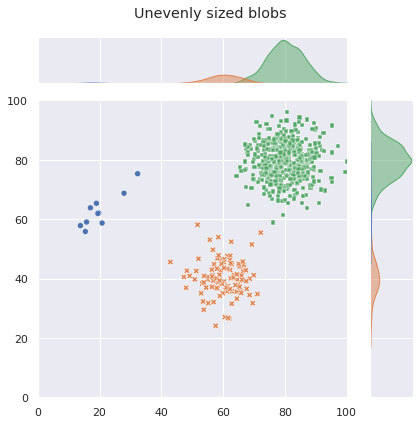

In [63]:
data_weighted, labels_weighted = make_blobs(
    n_features=2,
    n_samples=[
        10,
        100,
        500
    ],
    centers=[
        [20, 60],
        [60, 40],
        [80, 80]
    ],
    cluster_std=[
        6,
        6,
        6
    ]
)
plot_clustering(data_weighted, labels_weighted, _title="Unevenly sized blobs")


Apply k-means and GMM to the generated data.
Which outcomes do you expect?


In [95]:
def do_clustering_usb(n_clusters):
    global gmm
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_weighted)
    plot_clustering(data_weighted, kmeans.labels_, _centers=kmeans.cluster_centers_,
        _decision_boundary_model=kmeans,
        _title="Unevenly sized blobs: k-means"
    )

    gmm = GaussianMixture(n_components=n_clusters)
    gmm.fit(data_weighted)
    gmm_labels = gmm.predict(data_weighted)
    plot_gmm_clustering(data_weighted, gmm_labels, gmm,
        _decision_boundary=True,
        _title="Unevenly sized blobs: GMM"
    )

_=interact(do_clustering_usb,
           n_clusters=widgets.IntSlider(min=1, max=8, step=1, value=3, description="clusters"),
           )

print_gmm(gmm, _weights=True)

interactive(children=(IntSlider(value=3, description='clusters', max=8, min=1), Output()), _dom_classes=('widg…

GMM means:
 [[78.73839556 76.32165267]
 [81.67943032 83.0252675 ]
 [56.46051672 42.35562028]]

GMM covariances:
 [[[ 33.52826342  -5.12107828]
  [ -5.12107828  27.96824025]]

 [[ 32.18090623  -3.67947159]
  [ -3.67947159  23.60523401]]

 [[163.2899727  -72.78514769]
  [-72.78514769  78.44440534]]]

GMM weights:
 [0.41188994 0.40785917 0.1802509 ]



Note that the weights that the GMM assigns to each mixture component are not uniform as in the previous example, but scale according to the number of points in a cluster.
Running the previous snippets multiple times, you might have noticed that in some cases, a GMM will combine the two smaller clusters into a single mixture component, and split the big cluster into two components.

You can also try varying the dataset by changing the number of samples per cluster (`n_samples`), the mean of the clusters (`centers`) and the standard deviations (`cluster_std`).

## Using GMMs as Generative Models

While Gaussian Mixture Models can be used for clustering and classification, they are actually generative models.
This means, we can sample new data points from a GMM.
Let's consider only the first component of a GMM from the transformed blobs example:

In [65]:
gmm = GaussianMixture(n_components=3)
gmm.fit(data_transformed)

mean = gmm.means_[0]
covariance = gmm.covariances_[0]

print(f"First component mean:\n{mean}\n")
print(f"First component covariance:\n{covariance}")

First component mean:
[33.04366866 69.87090559]

First component covariance:
[[ 42.75350133 -43.27447997]
 [-43.27447997  53.3160917 ]]


Now we will sample new points from this distribution. Adjust the 'samples' slider for different sample sizes.

In [97]:
def sample_from_gmm(n_samples):
    samples = np.random.default_rng().multivariate_normal(mean, covariance, n_samples)
    plot_clustering(samples, _title="Samples: Transformed blob")

_=interact(sample_from_gmm,
           n_samples=widgets.IntSlider(min=1, max=2000, value=200, description='samples'))

interactive(children=(IntSlider(value=200, description='samples', max=2000, min=1), Output()), _dom_classes=('…

### Example: Moons

GMMs can also be used to fit more complex shapes.
We demonstrate this by generating a 'moons' dataset using `sklearn.datasets.make_moons`.

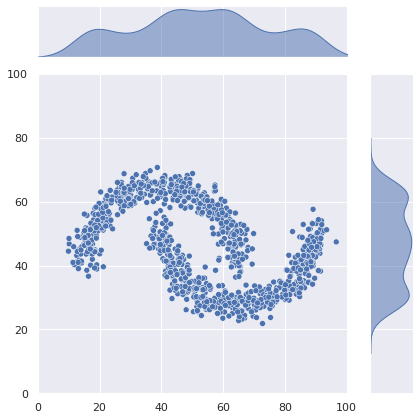

In [67]:
from sklearn.datasets import make_moons

data_moons, _ = make_moons(1000, noise=0.1)
data_moons = data_moons * 25 + 40

plot_clustering(data_moons)

Now let's fit a GMM to this data and then sample from the learned model.
This is an effective way to visualize what a model has learned.
Try fitting the model with 2, 3, 4, 6, 10 and 20 components and see if you can predict what the learned model will look like!
What can you observe?

In [98]:
def fit_moons_gmm(n_components, n_samples):
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(data_moons)

    gmm_labels = gmm.predict(data_moons)
    plot_gmm_clustering(data_moons, gmm_labels, gmm, _n_std=2, _title="GMM clusters")

    moon_sample_data, moon_sample_labels  = gmm.sample(n_samples)
    plot_clustering(moon_sample_data, _title="GMM samples",
                    _labels=moon_sample_labels
    )

_=interact(fit_moons_gmm,
           n_components=widgets.IntSlider(min=1, max=20, step=1, value=10, description="components"),
           n_samples=widgets.IntSlider(min=1, max=2000, step=1, value=1000, description="samples")
           )

interactive(children=(IntSlider(value=10, description='components', max=20, min=1), IntSlider(value=1000, desc…

### Example: Where to put the cup?

In this final example, we will consider a tabletop scene containing plates, cups and forks.
Given a dataset of where these objects are usually placed and an empty scene, we want to determine where in the scene we want to place a cup.

In this dataset, the position of the plate and fork do not differ a lot between samples, but the cup is sometimes placed on the left and sometimes on the right (bot more often on the left).
This is modeled by the following dataset:

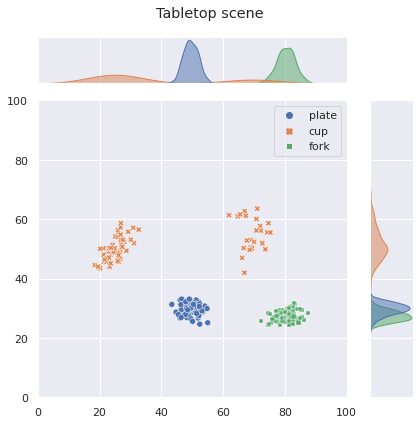

In [69]:
from tabletop import generate_tabletop_scene
tabletop_points, tabletop_labels = generate_tabletop_scene()
plot_clustering(tabletop_points, tabletop_labels, legend=True, _title="Tabletop scene")

Now, we fit a GMM to this data.
In this example, we will initialize the initial component means with predefined positions, so that they are in the same order later.

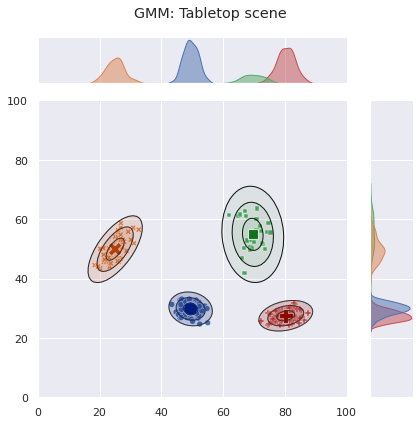

In [96]:
tabletop_gmm = GaussianMixture(
    n_components=4,
    means_init=[
       [50, 30],
       [30, 45],    # cup left
       [70, 55],    # cup right
       [80, 25]
    ]
)
tabletop_gmm.fit(tabletop_points)
tabletop_gmm_labels = tabletop_gmm.predict(tabletop_points)
plot_gmm_clustering(tabletop_points, tabletop_gmm_labels, tabletop_gmm, _title="GMM: Tabletop scene")

Now we are interested in the components for the left cup and the right cup.
First, we obtain the weights that the GMM has assigned these components, and normalize them so that they sum up to 1.
Then, we use these probabilities to sample, which component we are going to use.
Finally, we get the mean and covariance of the chosen component and sample a new cup position from it.

Component weights: [0.68749992 0.31250008]

Component choice: 2

Component mean: [69.58633439 54.88949949]
Component covariance:
[[11.11781142 -1.40825532]
 [-1.40825532 29.20396764]]

Sampled cup position: [68.52492158 56.01681292]


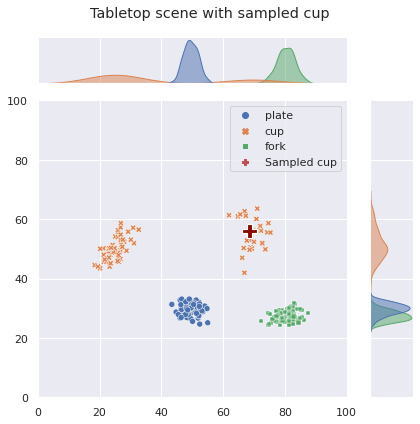

In [77]:
# Get cluster weights of the cup clusters and normalize them
cup_weights = tabletop_gmm.weights_[1:3]
cup_weights = cup_weights / np.sum(cup_weights)
print(f"Component weights: {cup_weights}\n")

# Sample which component to sample the position from
cup_choice = np.random.default_rng().choice([1, 2], p=cup_weights)
print(f"Component choice: {cup_choice}\n")

# Get mean and covariance of chosen component
cup_mean = tabletop_gmm.means_[cup_choice]
cup_covariance = tabletop_gmm.covariances_[cup_choice]
print(f"Component mean: {cup_mean}")
print(f"Component covariance:\n{cup_covariance}\n")

# Sample cup position
cup_position = np.random.default_rng().multivariate_normal(cup_mean, cup_covariance)
print(f"Sampled cup position: {cup_position}")

# Visualize
new_tabletop_points = np.vstack([tabletop_points, cup_position])
new_tabletop_labels = np.append(tabletop_labels, ["Sampled cup"])
plot_clustering(new_tabletop_points, new_tabletop_labels, legend=True, _title="Tabletop scene with sampled cup", _centers=np.array([[-5,-5],[-5,-5],[-5,5],cup_position]))